### Analyzing the Online Food Dataset

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Loading the dataset

In [2]:
df = pd.read_excel('onlinefoods.xlsx')
df.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,Pin code,Feedback
0,20,Female,Single,Student,Post Graduate,4,560001,Positive
1,24,Female,Single,Student,Graduate,3,560009,Positive
2,22,Male,Single,Student,Post Graduate,3,560017,Negative
3,22,Female,Single,Student,Graduate,6,560019,Positive
4,22,Male,Single,Student,Post Graduate,4,560010,Positive


#### Checking for duplicate values

In [3]:
df.shape

(388, 8)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(280, 8)

#### Handling Missing Values

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Educational Qualifications    0
Family size                   0
Pin code                      0
Feedback                      0
dtype: int64

#### Encoding Categorical Variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 374
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         280 non-null    int64 
 1   Gender                      280 non-null    object
 2   Marital Status              280 non-null    object
 3   Occupation                  280 non-null    object
 4   Educational Qualifications  280 non-null    object
 5   Family size                 280 non-null    int64 
 6   Pin code                    280 non-null    int64 
 7   Feedback                    280 non-null    object
dtypes: int64(3), object(5)
memory usage: 19.7+ KB


In [9]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col," : ",df[col].unique())
        

Gender  :  ['Female' 'Male']
Marital Status  :  ['Single' 'Married' 'Prefer not to say']
Occupation  :  ['Student' 'Employee']
Educational Qualifications  :  ['Post Graduate' 'Graduate' 'Uneducated']
Feedback  :  ['Positive' 'Negative ']


In [10]:
pd.get_dummies(df[['Gender','Marital Status','Occupation','Educational Qualifications','Feedback']], drop_first=True).astype(int)

,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated,Feedback_Positive
0,0,0,1,1,1,0,1
1,0,0,1,1,0,0,1
2,1,0,1,1,1,0,0
3,0,0,1,1,0,0,1
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
352,0,0,0,0,0,0,1
355,1,0,1,1,0,0,1
363,1,0,0,0,1,0,1
369,1,0,0,0,1,0,1


In [11]:
df = pd.get_dummies(data=df, columns=['Feedback','Gender','Marital Status','Occupation','Educational Qualifications'], drop_first=True).astype(int)

#### Checking for Outliers

In [12]:
df.describe()

,Age,Family size,Pin code,Feedback_Positive,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_Student,Educational Qualifications_Post Graduate,Educational Qualifications_Uneducated
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,24.707143,3.275000,560037.782143,0.810714,0.575000,0.032143,0.657143,0.528571,0.507143,0.007143
std,3.058560,1.364981,30.779695,0.392437,0.495228,0.176695,0.475514,0.500077,0.500844,0.084364
min,18.000000,1.000000,560001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2.000000,560011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,3.000000,560029.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,26.000000,4.000000,560066.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,33.000000,6.000000,560109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


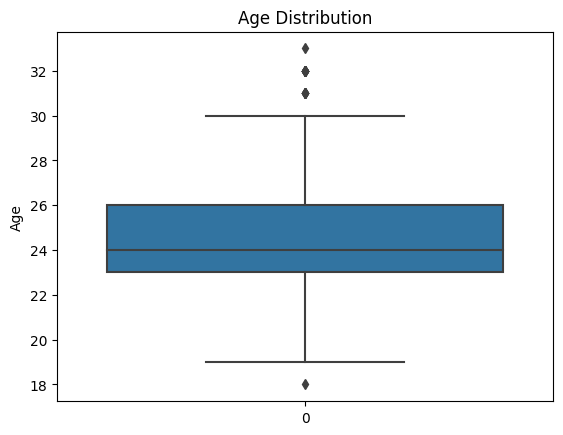

In [12]:
sns.boxplot(df['Age'])
plt.title('Age Distribution')
plt.ylabel('Age')
plt.show()

In [13]:
def outlier_finder(array):
    q1 = array.quantile(0.25)
    q3 = array.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    outliers = []
    for i in array:
        if i < lower_bound or i > upper_bound:
            outliers.append(i)
    return outliers

In [14]:
outlier_finder(df['Age'])

[32,
 31,
 32,
 18,
 31,
 32,
 32,
 32,
 33,
 32,
 32,
 32,
 31,
 31,
 32,
 31,
 32,
 32,
 32,
 31,
 31]

In [21]:
def replace_outliers(array):
    q1 = array.quantile(0.25)
    q3 = array.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    new_array = array.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return new_array

In [22]:
replace_outliers(df['Age'])

0      20.0
1      24.0
2      22.0
3      22.0
4      22.0
       ... 
352    29.0
355    21.0
363    30.5
369    30.0
374    21.0
Name: Age, Length: 280, dtype: float64

In [23]:
df['Age'] = replace_outliers(df['Age'])

In [24]:
outlier_finder(df['Family size'])

[]

In [25]:
df['Feedback_Positive'].value_counts()

Feedback_Positive
1    227
0     53
Name: count, dtype: int64

#### Independent Variables

In [26]:
X = df.drop(('Feedback_Positive'), axis=1)

#### Dependent Variable

In [27]:
y = df['Feedback_Positive']

#### Training data and Testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
y_train.value_counts()

Feedback_Positive
1    182
0     42
Name: count, dtype: int64

#### Scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Model Training

In [31]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)

LogisticRegression()

#### Training Results

In [32]:
y_pred = logistic.predict(X_test_scaled)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test,y_pred))

Accuracy Score: 0.8035714285714286
Precision Score: 0.8035714285714286
Recall Score: 1.0
F1 Score: 0.8910891089108911
[[ 0 11]
 [ 0 45]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      1.00      0.89        45

    accuracy                           0.80        56
   macro avg       0.40      0.50      0.45        56
weighted avg       0.65      0.80      0.72        56



C:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vikas Chauhan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavi

In [34]:
def evaluation(model, y_test, X_test_scaled):
    y_pred = model.predict(X_test_scaled)
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Precision Score:", precision_score(y_test, y_pred))
    print("Recall Score:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test,y_pred))

In [35]:
evaluation(logistic, y_test, X_test_scaled)

Accuracy Score: 0.8035714285714286
Precision Score: 0.8035714285714286
Recall Score: 1.0
F1 Score: 0.8910891089108911
Confusion Matrix:
[[ 0 11]
 [ 0 45]]


In [36]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
evaluation(lda, y_test, X_test_scaled)

Accuracy Score: 0.7857142857142857
Precision Score: 0.8
Recall Score: 0.9777777777777777
F1 Score: 0.8800000000000001
Confusion Matrix:
[[ 0 11]
 [ 1 44]]


In [37]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
evaluation(svc, y_test, X_test_scaled)

Accuracy Score: 0.8035714285714286
Precision Score: 0.8035714285714286
Recall Score: 1.0
F1 Score: 0.8910891089108911
Confusion Matrix:
[[ 0 11]
 [ 0 45]]


In [38]:
kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train_scaled, y_train)
evaluation(kneighbors, y_test, X_test_scaled)

Accuracy Score: 0.8035714285714286
Precision Score: 0.8035714285714286
Recall Score: 1.0
F1 Score: 0.8910891089108911
Confusion Matrix:
[[ 0 11]
 [ 0 45]]


In [39]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
evaluation(dtree, y_test, X_test_scaled)

Accuracy Score: 0.7142857142857143
Precision Score: 0.8085106382978723
Recall Score: 0.8444444444444444
F1 Score: 0.8260869565217391
Confusion Matrix:
[[ 2  9]
 [ 7 38]]


In [40]:
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
evaluation(forest, y_test, X_test_scaled)

Accuracy Score: 0.7678571428571429
Precision Score: 0.7962962962962963
Recall Score: 0.9555555555555556
F1 Score: 0.8686868686868687
Confusion Matrix:
[[ 0 11]
 [ 2 43]]


In [41]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
evaluation(ada, y_test, X_test_scaled)

Accuracy Score: 0.7321428571428571
Precision Score: 0.7884615384615384
Recall Score: 0.9111111111111111
F1 Score: 0.845360824742268
Confusion Matrix:
[[ 0 11]
 [ 4 41]]


In [42]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train_scaled, y_train)
evaluation(gradient, y_test, X_test_scaled)

Accuracy Score: 0.75
Precision Score: 0.803921568627451
Recall Score: 0.9111111111111111
F1 Score: 0.8541666666666666
Confusion Matrix:
[[ 1 10]
 [ 4 41]]


In [43]:
bagging = BaggingClassifier()
bagging.fit(X_train_scaled, y_train)
evaluation(bagging, y_test, X_test_scaled)

Accuracy Score: 0.7321428571428571
Precision Score: 0.7884615384615384
Recall Score: 0.9111111111111111
F1 Score: 0.845360824742268
Confusion Matrix:
[[ 0 11]
 [ 4 41]]


In [44]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
evaluation(naive_bayes, y_test, X_test_scaled)

Accuracy Score: 0.7678571428571429
Precision Score: 0.7962962962962963
Recall Score: 0.9555555555555556
F1 Score: 0.8686868686868687
Confusion Matrix:
[[ 0 11]
 [ 2 43]]


#### Balance Dataset

In [45]:
y.value_counts()

Feedback_Positive
1    227
0     53
Name: count, dtype: int64

In [46]:
smote = SMOTE(sampling_strategy='minority')
X_balanced, y_balanced = smote.fit_resample(X, y)
y_balanced.value_counts()

Feedback_Positive
1    227
0    227
Name: count, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
logistic = LogisticRegression()
logistic.fit(X_train_scaled, y_train)
evaluation(logistic, y_test, X_test_scaled)

Accuracy Score: 0.6923076923076923
Precision Score: 0.6808510638297872
Recall Score: 0.7111111111111111
F1 Score: 0.6956521739130436
Confusion Matrix:
[[31 15]
 [13 32]]


In [50]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
evaluation(lda, y_test, X_test_scaled)

Accuracy Score: 0.6923076923076923
Precision Score: 0.6808510638297872
Recall Score: 0.7111111111111111
F1 Score: 0.6956521739130436
Confusion Matrix:
[[31 15]
 [13 32]]


In [51]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
evaluation(svc, y_test, X_test_scaled)

Accuracy Score: 0.7472527472527473
Precision Score: 0.72
Recall Score: 0.8
F1 Score: 0.7578947368421052
Confusion Matrix:
[[32 14]
 [ 9 36]]


In [52]:
kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train_scaled, y_train)
evaluation(kneighbors, y_test, X_test_scaled)

Accuracy Score: 0.7362637362637363
Precision Score: 0.7692307692307693
Recall Score: 0.6666666666666666
F1 Score: 0.7142857142857142
Confusion Matrix:
[[37  9]
 [15 30]]


In [53]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)
evaluation(dtree, y_test, X_test_scaled)

Accuracy Score: 0.7472527472527473
Precision Score: 0.75
Recall Score: 0.7333333333333333
F1 Score: 0.7415730337078651
Confusion Matrix:
[[35 11]
 [12 33]]


In [54]:
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)
evaluation(forest, y_test, X_test_scaled)

Accuracy Score: 0.8021978021978022
Precision Score: 0.8
Recall Score: 0.8
F1 Score: 0.8000000000000002
Confusion Matrix:
[[37  9]
 [ 9 36]]


In [55]:
ada = AdaBoostClassifier()
ada.fit(X_train_scaled, y_train)
evaluation(ada, y_test, X_test_scaled)

Accuracy Score: 0.7582417582417582
Precision Score: 0.7674418604651163
Recall Score: 0.7333333333333333
F1 Score: 0.7499999999999999
Confusion Matrix:
[[36 10]
 [12 33]]


In [56]:
gradient = GradientBoostingClassifier()
gradient.fit(X_train_scaled, y_train)
evaluation(gradient, y_test, X_test_scaled)

Accuracy Score: 0.8351648351648352
Precision Score: 0.8409090909090909
Recall Score: 0.8222222222222222
F1 Score: 0.8314606741573033
Confusion Matrix:
[[39  7]
 [ 8 37]]


In [57]:
bagging = BaggingClassifier()
bagging.fit(X_train_scaled, y_train)
evaluation(bagging, y_test, X_test_scaled)

Accuracy Score: 0.8241758241758241
Precision Score: 0.8536585365853658
Recall Score: 0.7777777777777778
F1 Score: 0.8139534883720929
Confusion Matrix:
[[40  6]
 [10 35]]


In [58]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)
evaluation(naive_bayes, y_test, X_test_scaled)

Accuracy Score: 0.6703296703296703
Precision Score: 0.6744186046511628
Recall Score: 0.6444444444444445
F1 Score: 0.6590909090909091
Confusion Matrix:
[[32 14]
 [16 29]]
